# Explore the linear instability analysis in the simulations 

In [1]:
# load appropriate modules
import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
%matplotlib inline
from xgcm import Grid
from scipy import linalg as lin
from scipy import signal as sig
from scipy import fftpack as fft
from scipy import interpolate as naiso
from matplotlib import colors, ticker, cm
import xrft
#import gsw

In [2]:
from oceanmodes import baroclinic

In [3]:
start = 0.0
stop = 1.0
number_of_lines=9
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ plt.cm.Set1(x) for x in cm_subsection ]

In [4]:
# Make dictionary
res_time = {"20":{'dt':1200, 'iter1': 5702400, 'iterend':5728320},
            "05":{'dt':300, 'iter1':10368000, 'iterend':10471680}, 
            "01":{'dt':40 , 'iter1':1166400, 'iterend':1944000}}

for keys in res_time.keys():
    res_time[keys]['dirname']='/swot/SUM05/dbalwada/channel_beta/{0}km/tracer_exp1/'.format(keys)
    
res_time['20']['dt_out'] = 18
res_time['05']['dt_out'] = 72
res_time['01']['dt_out'] = 21600

In [5]:
for keys in res_time.keys():
    ds = open_mdsdataset(res_time[keys]['dirname'],  
                             delta_t=res_time[keys]['dt'], prefix=['Ttave','uVeltave', 'PhHytave']
                     ,ignore_unknown_vars=True, geometry='cartesian')
    res_time[keys]['data_mean']=ds

/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/xmitgcm-0.2.1-py3.5.egg/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/xmitgcm-0.2.1-py3.5.egg/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


In [6]:
# Load data
for keys in res_time.keys():
    
    npick = 1 # pick up every npick'th file as the original out is very dense (12 hours)
    
    dt_out = int(res_time[keys]['dt_out'])
    T1 = int(res_time[keys]['iter1'])
    
    T2 = int(res_time[keys]['iterend'])
    T360days = T2
    
    if keys == '01':
        npick=1
        T360days = T2 
    
    iters = range(T1+ dt_out, T360days+dt_out, dt_out*npick)
    
    ds = open_mdsdataset(res_time[keys]['dirname'], iters = iters, 
                             delta_t=res_time[keys]['dt'], prefix=['KPP_surf']
                     ,ignore_unknown_vars=True, geometry='cartesian')
    res_time[keys]['data_others']=ds

/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/xmitgcm-0.2.1-py3.5.egg/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/xmitgcm-0.2.1-py3.5.egg/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


KeyboardInterrupt: 

# Plots of vertical stratification - details

In [7]:
res_time.keys()

dict_keys(['01', '20', '05'])

In [8]:
# Calculate the mean N2

for key in res_time.keys():
    grid = Grid(res_time[key]['data_mean'], periodic='X')
    
    ds =res_time[key]['data_mean'] 
    dTdz = grid.diff(ds.Ttave.mean('time'),'Z',boundary='extend'
                ) / grid.diff(ds.Ttave.Z, 'Z', boundary='extend')
    
    N2 = 9.81*2e-4*dTdz
    
    res_time[key]['N2'] = N2
    
    res_time[key]['N2'].load()

/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/dask-0.17.2+14.gbd9fed7-py3.5.egg/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/dask-0.17.2+14.gbd9fed7-py3.5.egg/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/dask-0.17.2+14.gbd9fed7-py3.5.egg/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


In [9]:
from matplotlib import colors

In [10]:
res_time['01']

{'N2': <xarray.DataArray (Zl: 76, YC: 2000, XC: 2000)>
 array([[[          nan,           nan, ...,           nan,           nan],
         [          nan,           nan, ...,           nan,           nan],
         ...,
         [          nan,           nan, ...,           nan,           nan],
         [          nan,           nan, ...,           nan,           nan]],
 
        [[-0.000000e+00, -0.000000e+00, ..., -0.000000e+00, -0.000000e+00],
         [-2.365117e-06, -2.366319e-06, ..., -2.362603e-06, -2.363805e-06],
         ...,
         [ 3.474265e-04,  3.471065e-04, ...,  3.501667e-04,  3.483017e-04],
         [ 3.452983e-04,  3.451942e-04, ...,  3.458999e-04,  3.452528e-04]],
 
        ...,
 
        [[-0.000000e+00, -0.000000e+00, ..., -0.000000e+00, -0.000000e+00],
         [ 9.160958e-09,  9.181433e-09, ...,  9.135143e-09,  9.146715e-09],
         ...,
         [ 3.555869e-08,  3.561299e-08, ...,  3.540825e-08,  3.545276e-08],
         [ 3.269317e-08,  3.284450e-08, ...,  

In [285]:
Hbl = res_time['01']['data_others']['KPPhbl']

In [289]:
Hmean = Hbl.mean('time').load()

/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


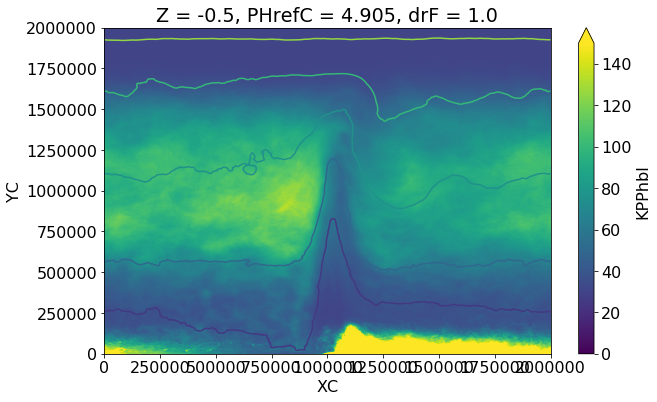

In [291]:
plt.figure(figsize=(10,6))
Hmean.plot(vmax=150.)
Temp.isel(Z=0).plot.contour()

(-1500, 0)

/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


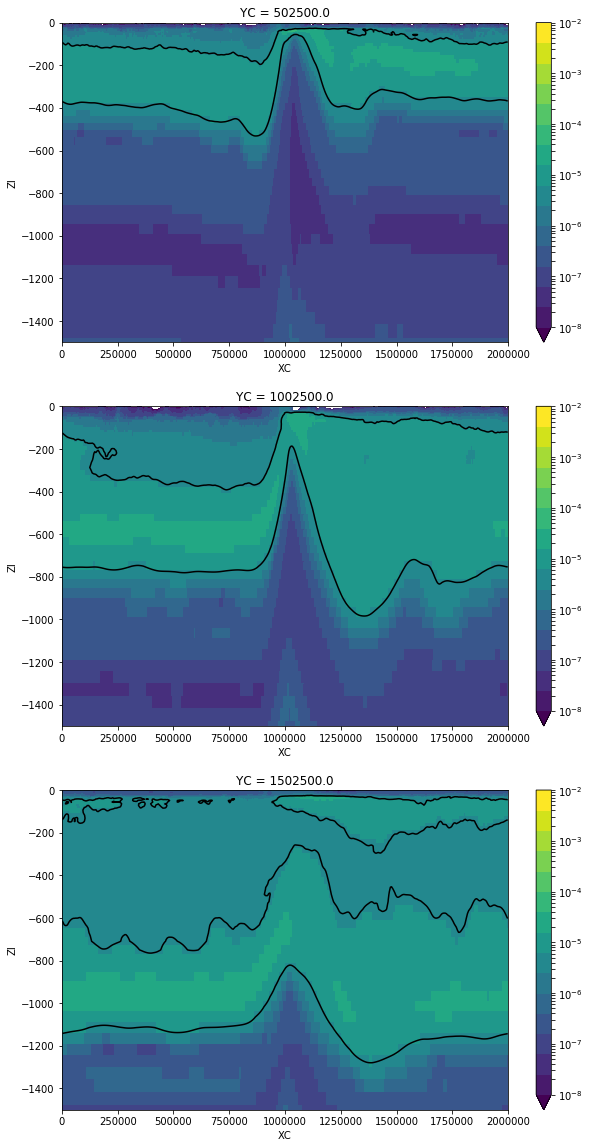

In [12]:
plt.figure(figsize=(10,20))
lev_exp = np.linspace(-8.,-2.,16)
levs = np.power(10, lev_exp)

plt.subplot(311)
N2.sel(YC=500e3, method='nearest').plot(levels=levs, norm=colors.LogNorm(),vmin=10**-6,vmax=10**-4)
N2.sel(YC=500e3, method='nearest').plot.contour(levels=[6e-6], colors='k')
#Temp.sel(YC=500e3, method='nearest').plot.contour(levels=[3,4.5], linestyle='--', colors='r')
plt.ylim([-1500,0])


plt.subplot(312)
N2.sel(YC=1000e3, method='nearest').plot(levels=levs, norm=colors.LogNorm(),vmin=10**-6,vmax=10**-4)
N2.sel(YC=1000e3, method='nearest').plot.contour(levels=[6e-6], colors='k')
#Temp.sel(YC=1000e3, method='nearest').plot.contour(levels=[3,4.5], linestyle='--', colors='r')
plt.ylim([-1500,0])


plt.subplot(313)
N2.sel(YC=1500e3, method='nearest').plot(levels=levs, norm=colors.LogNorm(),vmin=10**-6,vmax=10**-4)
N2.sel(YC=1500e3, method='nearest').plot.contour(levels=[6e-6], colors='k')
#Temp.sel(YC=1500e3, method='nearest').plot.contour(levels=[3,4.5], linestyle='--', colors='r')
plt.ylim([-1500,0])

/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)


(-1500, 0)

/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


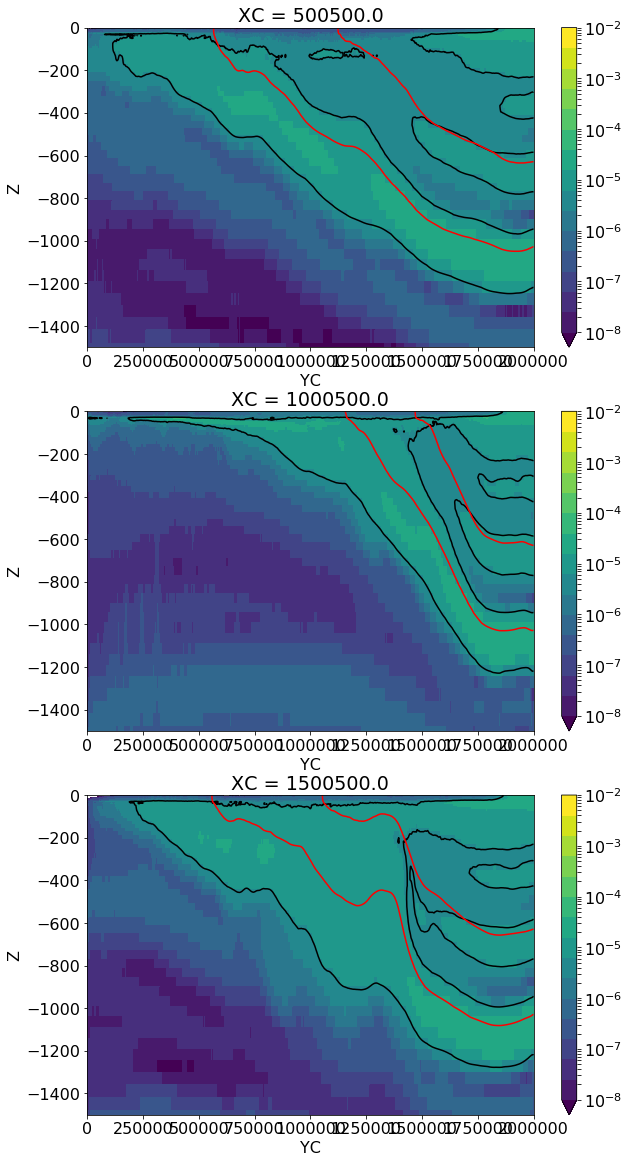

In [292]:
plt.figure(figsize=(10,20))
lev_exp = np.linspace(-8.,-2.,16)
levs = np.power(10, lev_exp)

plt.subplot(311)
N2.sel(XC=500e3, method='nearest').plot(levels=levs, norm=colors.LogNorm(),vmin=10**-6,vmax=10**-4)
N2.sel(XC=500e3, method='nearest').plot.contour(levels=[6e-6], colors='k')
Temp.sel(XC=500e3, method='nearest').plot.contour(levels=[3,4.5], linestyle='--', colors='r')
plt.ylim([-1500,0])


plt.subplot(312)
N2.sel(XC=1000e3, method='nearest').plot(levels=levs, norm=colors.LogNorm(),vmin=10**-6,vmax=10**-4)
N2.sel(XC=1000e3, method='nearest').plot.contour(levels=[6e-6], colors='k')
Temp.sel(XC=1000e3, method='nearest').plot.contour(levels=[3,4.5], linestyle='--', colors='r')
plt.ylim([-1500,0])


plt.subplot(313)
N2.sel(XC=1500e3, method='nearest').plot(levels=levs, norm=colors.LogNorm(),vmin=10**-6,vmax=10**-4)
N2.sel(XC=1500e3, method='nearest').plot.contour(levels=[6e-6], colors='k')
Temp.sel(XC=1500e3, method='nearest').plot.contour(levels=[3,4.5], linestyle='--', colors='r')
plt.ylim([-1500,0])

(-1500, 0)

/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


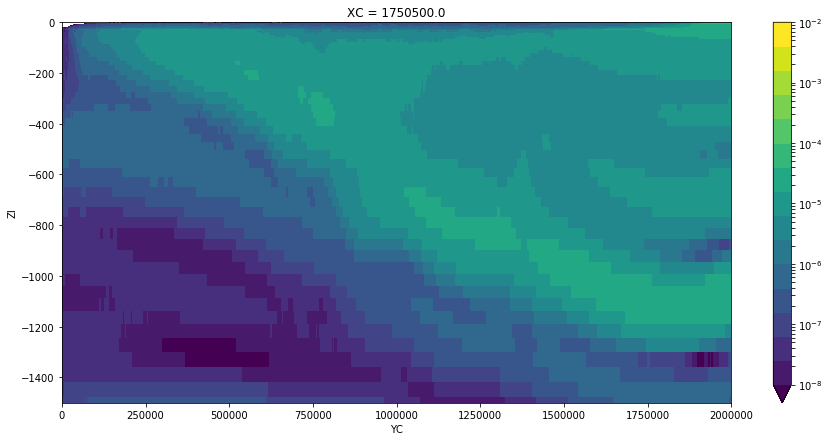

In [38]:
plt.figure(figsize=(15,7))
lev_exp = np.linspace(-8.,-2.,16)
levs = np.power(10, lev_exp)

N2.sel(XC=1750e3, method='nearest').plot(levels=levs, norm=colors.LogNorm(),vmin=10**-6,vmax=10**-4)
#dT.plot.contour(levels=[-0.8,0.8], colors='k')

#plt.plot(res_coarse['01'].XC,  
#         -res_coarse['01'].KPPhbl.isel(YC=1000, time=-1))

plt.ylim([-1500,0])

# Plots of vertical geostrophic shear

In [13]:
f_o  = -0.83e-4
beta = 1.87e-11 

In [14]:
for key in res_time.keys():
    ds = res_time[key]['data_mean'].mean('time')
    
    grid = Grid(ds, periodic=['X','Y'])

    dx = ds.dxC[0,0]
    dy = ds.dyC[0,0]
    
    f = f_o + beta*ds.YC
    
    Vgeo_mean = grid.interp(grid.diff(ds.PhHytave,'X')/dx, 'X')/f
    Ugeo_mean = -grid.interp(grid.diff(ds.PhHytave,'Y')/dx, 'Y')/f
    
    res_time[key]['Ugeo'] = Ugeo_mean
    res_time[key]['Vgeo'] = Vgeo_mean
    
    res_time[key]['Ugeo'].load()
    res_time[key]['Vgeo'].load()    

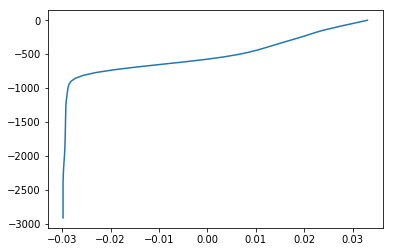

In [16]:
plt.plot(Ugeo_mean.sel(XC=500e3, YC=1000e3, method='nearest'), Ugeo_mean.Z)

In [17]:
dUdz = grid.diff(Ugeo_mean, 'Z', boundary='extend')/grid.diff(Ugeo_mean.Z, 'Z', boundary='extend')

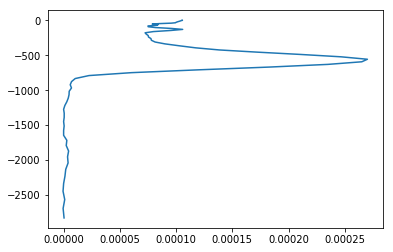

In [61]:
plt.plot(dUdz.sel(XC=500e3, YC=1000e3, method='nearest'), dUdz.Zl)

# Vertical modes from stratification

In [85]:
Profile = N2.data[12:]
Z = -N2.Zl.data[12:]

In [94]:
f_o+ beta*N2.YC[iy].values

-4.5646749999999995e-05

In [95]:
ny = Profile.shape[1]
nz = Profile.shape[0]
zphi = np.nan*np.ones([ny,nz+1])
Rd   = np.nan*np.ones([ny,6])
vd   = np.nan*np.ones([ny,nz+1,6])

for iy in range(0, ny):
    try:
        zphi[iy,:], Rd[iy,:], vd[iy,:] = baroclinic.neutral_modes_from_N2_profile(Z, Profile[:,iy], f_o+beta*N2.YC[iy].values)
    except:
        pass

In [ ]:
nx = Profile.shape[2]
ny = Profile.shape[1]
nz = Profile.shape[0]
zphi = np.nan*np.ones([ny,nx,nz+1])
Rd   = np.nan*np.ones([ny,nx,6])
vd   = np.nan*np.ones([ny,nx,nz+1,6])

for iy in range(0, ny):
    print(iy)
    for ix in range(0,nx):
        try:
            zphi[iy,ix,:], Rd[iy,ix,:], vd[iy,ix,:] = baroclinic.neutral_modes_from_N2_profile(Z, Profile[:,iy,ix], f_o+beta*N2.YC[iy].values)
        except:
            pass

0


/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/oceanmodes-0.1-py3.5.egg/oceanmodes/baroclinic.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  a = (dzf[i-1] * N2[i-1] * dzc[i-1])**-1
/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/oceanmodes-0.1-py3.5.egg/oceanmodes/baroclinic.py:168: RuntimeWarning: divide by zero encountered in double_scalars
  b = -(dzf[i-1] * N2[i-1]* dzc[i-1])**-1 - (dzf[i] * N2[i] * dzc[i-1])**-1
/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/oceanmodes-0.1-py3.5.egg/oceanmodes/baroclinic.py:169: RuntimeWarning: divide by zero encountered in double_scalars
  c = (dzf[i] * N2[i] * dzc[i-1])**-1
/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/oceanmodes-0.1-py3.5.egg/oceanmodes/baroclinic.py:171: RuntimeWarning: divide by zero encountered in double_scalars
  a = (dzf[0] * N2[0] * dztop)**-1
/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/oceanmodes

1


/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/oceanmodes-0.1-py3.5.egg/oceanmodes/baroclinic.py:202: RuntimeWarning: invalid value encountered in power
  Rd = (-w)**-0.5 / np.absolute(f0)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/oceanmodes-0.1-py3.5.egg/oceanmodes/baroclinic.py:202: RuntimeWarning: divide by zero encountered in power
  Rd = (-w)**-0.5 / np.absolute(f0)


18
19
20
21
22
23
24
25
26
27


In [96]:
Rd

array([[nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       ...,
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan]])

Text(0,0.5,'$2\\pi/K_d$ (km)')

/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


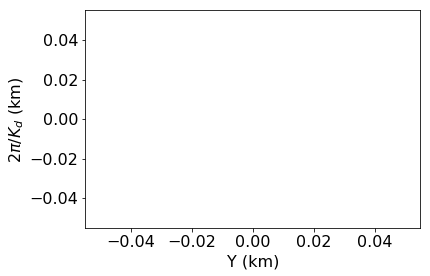

In [90]:
plt.plot(N2.YC, 2*np.pi*Rd[:,1]/1000)
plt.xlabel('Y (km)')
plt.ylabel('$2\pi/K_d$ (km)')

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


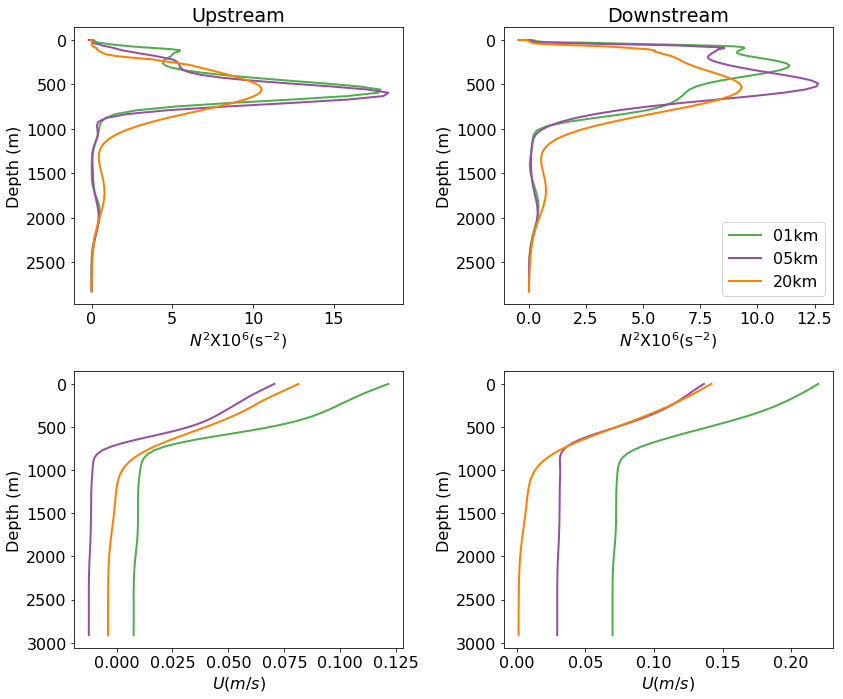

In [339]:
plt.figure(figsize=(12,10))


plt.subplot(221)
n=2
for keys in ['01','05','20']:
#    print(keys)
    Profile = res_time[keys]['N2'].sel(XC=slice(550e3, 650e3)).sel(YC=slice(950e3, 1050e3)).mean(['XC','YC']).data[1:]
    Zl = -res_time[keys]['N2'].Zl.data[1:]
    plt.plot(Profile*1e6, Zl, color=colors[n], linewidth=2)
    n+=1
plt.gca().invert_yaxis()
plt.title('Upstream')
plt.ylabel('Depth (m)')
plt.xlabel('$N^2$X$ 10^6 $(s$^{-2}$)')

plt.subplot(222)
n=2
for keys in ['01','05','20']:
#    print(keys)
    Profile = res_time[keys]['N2'].sel(XC=slice(1550e3, 1650e3)).sel( YC=slice(950e3, 1050e3)).mean(['XC','YC']).data[1:]
    Zl = -res_time[keys]['N2'].Zl.data[1:]
    plt.plot(Profile*1e6, Zl, label=keys+'km', color=colors[n], linewidth=2)
    n+=1
plt.gca().invert_yaxis()
plt.title('Downstream')
plt.ylabel('Depth (m)')
plt.xlabel('$N^2$X$ 10^6 $(s$^{-2}$)')
plt.legend()


plt.subplot(223)
n=2
for keys in ['01','05','20']:
    Profile = res_time[keys]['Ugeo'].sel(XC=slice(550e3, 650e3)).sel(YC=slice(950e3, 1050e3)).mean(['XC','YC']).data[1:]
    Zl = -res_time[keys]['Ugeo'].Z.data[1:]
    plt.plot(Profile, Zl, color=colors[n], linewidth=2)
    
    Profile = res_time[keys]['Vgeo'].sel(XC=slice(550e3, 650e3)).sel(YC=slice(950e3, 1050e3)).mean(['XC','YC']).data[1:]
    Zl = -res_time[keys]['Ugeo'].Z.data[1:]
   # plt.plot(Profile, Zl, '--',color=colors[n], linewidth=2)
    n+=1
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('$U (m/s)$')

plt.subplot(224)
n=2
for keys in ['01','05','20']:
    Profile = res_time[keys]['Ugeo'].sel(XC=slice(1550e3, 1650e3)).sel(YC=slice(950e3, 1050e3)).mean(['XC','YC']).data[1:]
    Zl = -res_time[keys]['Ugeo'].Z.data[1:]
    plt.plot(Profile, Zl, color=colors[n], linewidth=2)
    
    Profile = res_time[keys]['Vgeo'].sel(XC=slice(1550e3, 1650e3)).sel(YC=slice(950e3, 1050e3)).mean(['XC','YC']).data[1:]
    Zl = -res_time[keys]['Ugeo'].Z.data[1:]
    #plt.plot(Profile, Zl, '--',color=colors[n], linewidth=2)    
    n+=1
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('$U (m/s)$')

plt.tight_layout()
plt.savefig('figures/stratification_n_shear.eps', format='eps', dpi=100)

/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/oceanmodes-0.1-py3.5.egg/oceanmodes/baroclinic.py:202: RuntimeWarning: invalid value encountered in power
  Rd = (-w)**-0.5 / np.absolute(f0)


In [31]:
Rd

array([           nan, 18321.16006141,  5891.63580361,  4029.84016584,
        3387.79354937,  2591.06907634])

# Linear Instability

In region that is upstream

In [200]:
Rd=12.5e3
dx = ds.dxC[0,0].values
dy = ds.dyC[0,0].values

Nx = 100
Ny = 100

#k = 2*np.pi*fft.fftshift( fft.fftfreq(Nx, dx/33) )
#l = 2*np.pi*fft.fftshift( fft.fftfreq(Ny, dy/33) )

#k = k[np.absolute(k) < 2000.*Rd**-1]
#l = l[np.absolute(l) < 20.*Rd**-1]
k= np.logspace(-2, 1.5,100)/1000.
l =np.array([0.])

etax = np.zeros(2)
etay = np.zeros(2)

In [340]:
eigen_calc = {'20':{},'05':{},'01':{}}
xloc = slice(850e3, 950e3)
yloc = slice(950e3, 1050e3)
for keys in res_time.keys():
    print(keys)
    Profile = res_time[keys]['N2'].sel(XC=xloc).sel( YC=yloc).mean(['XC','YC']).data[1:]
    Uprofile = res_time[keys]['Ugeo'].sel(XC=xloc).sel( YC=yloc).mean(['XC','YC']).data
    Vprofile = res_time[keys]['Vgeo'].sel(XC=xloc).sel( YC=yloc).mean(['XC','YC']).data
    
    Zl = -res_time[keys]['N2'].Zl.data[1:]
    Z  = -res_time[keys]['Ugeo'].Z.data

    zpsi, w, psi = baroclinic.instability_analysis_from_N2_profile(Zl, Profile, f_o, beta, 
                                                              k,l, Z, Uprofile, 0*Vprofile, 
                                                               etax, etay,
                                                              Ah=0, num=2)
    
    eigen_calc[keys]['zpsi'] = zpsi
    eigen_calc[keys]['w']    = w
    eigen_calc[keys]['psi']  = psi

05
20
01


/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


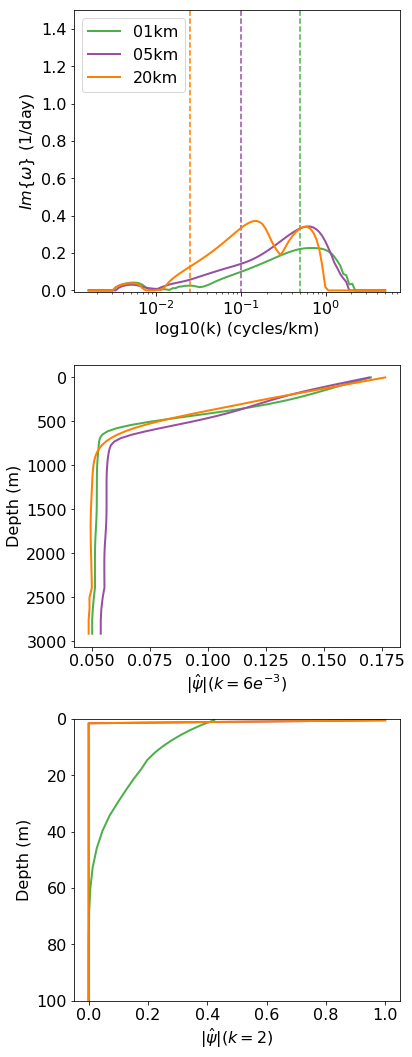

In [341]:
# vertical modes corresponding to the 2 peaks
plt.figure(figsize=(6,15))
n=2
plt.subplot(311)
for key in ['01','05','20']:
    plt.plot((k*1000./np.pi/2), (eigen_calc[key]['w'].imag[0]*24*3600.).T,label=key+'km',color=colors[n], linewidth=2)
    

    y=np.linspace(-1,2)
    x = y/y/2/int(key)
    plt.plot(x,y,'--', color=colors[n])
    n+=1
    
plt.plot()
plt.xscale('log')
plt.xlabel('log10(k) (cycles/km)')
plt.ylabel('$Im\{\omega\} $ (1/day)')
plt.ylim(-0.01, 1.5)
#plt.grid()
plt.legend()

plt.subplot(312)
n=2
for key in ['01','05','20']:
    psi = eigen_calc[key]['psi']
    w = eigen_calc[key]['w']
    zpsi = eigen_calc[key]['zpsi']    
    plt.plot(np.reshape(np.absolute(psi[:, 0]), (len(zpsi), psi.shape[-1]*psi.shape[-2])
                   )[:, np.argwhere(k*1000./np.pi/2<6e-3)[-1] ], zpsi, color=colors[n], linewidth=2)
    n+=1

plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('$|\hat{\psi}| (k=6e^{-3})$')

plt.subplot(313)
n=2
for key in ['01','05','20']:
    psi = eigen_calc[key]['psi']
    w = eigen_calc[key]['w']
    zpsi = eigen_calc[key]['zpsi']    
    plt.plot(np.reshape(np.absolute(psi[:, 0]), (len(zpsi), psi.shape[-1]*psi.shape[-2])
                   )[:, np.argwhere(k*1000./np.pi/2<2)[-1] ], zpsi, color=colors[n], linewidth=2)
    n+=1
plt.gca().invert_yaxis()
plt.ylim([100,0])
plt.ylabel('Depth (m)')
plt.xlabel('$|\hat{\psi}| (k=2)$')
plt.tight_layout()

#plt.savefig('figures/instability_upstream.eps', format='eps', dpi=100)

/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


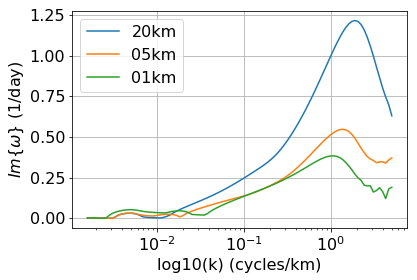

In [253]:
for key in ['20','05','01']:
    plt.plot((k*1000./np.pi/2), (eigen_calc[key]['w'].imag[0]*24*3600.).T,label=key+'km')
#plt.plot((k*1000./np.pi/2), (eigen_calc['05']['w'].imag[0]*24*3600.).T)
#plt.plot((k*1000./np.pi/2), (eigen_calc['01']['w'].imag[0]*24*3600.).T)
plt.xscale('log')
plt.xlabel('log10(k) (cycles/km)')
plt.ylabel('$Im\{\omega\} $ (1/day)')
plt.grid()
plt.legend()

/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


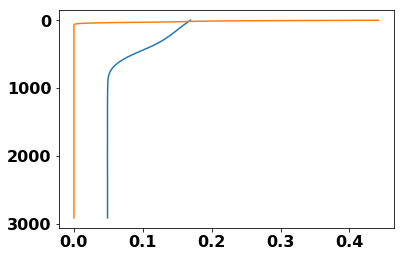

In [173]:
# vertical modes corresponding to the 2 peaks

plt.plot(np.reshape(np.absolute(psi[:, 0]), (len(zpsi), psi.shape[-1]*psi.shape[-2])
                   )[:, np.argwhere(k*1000./np.pi/2<5e-3)[-1] ], zpsi)

plt.plot(np.reshape(np.absolute(psi[:, 0]), (len(zpsi), psi.shape[-1]*psi.shape[-2])
                   )[:, np.argwhere(k*1000./np.pi/2<2)[-1] ], zpsi)
plt.gca().invert_yaxis()


Text(0,0.5,'Depth (m)')

/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


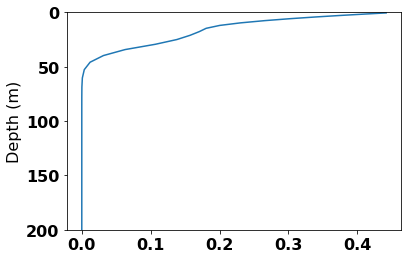

In [175]:
plt.plot(np.reshape(np.absolute(psi[:, 0]), (len(zpsi), psi.shape[-1]*psi.shape[-2])
                   )[:, np.argwhere(k*1000./np.pi/2<2)[-1] ], zpsi)
plt.gca().invert_yaxis()
plt.ylim([200,0])
plt.ylabel('Depth (m)')

In [293]:
eigen_calc = {'20':{},'05':{},'01':{}}
xloc = slice(1550e3, 1650e3)
yloc = slice(950e3, 1050e3)
for keys in res_time.keys():
    print(keys)
    Profile = res_time[keys]['N2'].sel(XC=xloc).sel( YC=yloc).mean(['XC','YC']).data[1:]
    Uprofile = res_time[keys]['Ugeo'].sel(XC=xloc).sel( YC=yloc).mean(['XC','YC']).data
    Vprofile = res_time[keys]['Vgeo'].sel(XC=xloc).sel( YC=yloc).mean(['XC','YC']).data
    
    Zl = -res_time[keys]['N2'].Zl.data[1:]
    Z  = -res_time[keys]['Ugeo'].Z.data

    zpsi, w, psi = baroclinic.instability_analysis_from_N2_profile(Zl, Profile, f_o, beta, 
                                                              k,l, Z, Uprofile, 0*Vprofile, 
                                                               etax, etay,
                                                              Ah=0, num=2)
    
    eigen_calc[keys]['zpsi'] = zpsi
    eigen_calc[keys]['w']    = w
    eigen_calc[keys]['psi']  = psi

05
20
01


/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


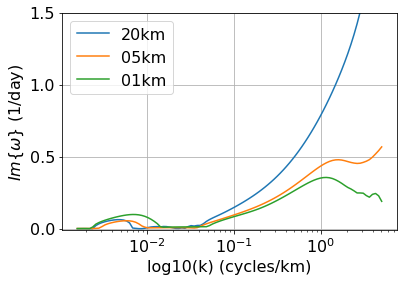

In [296]:
for key in ['20','05','01']:
    plt.plot((k*1000./np.pi/2), (eigen_calc[key]['w'].imag[0]*24*3600.).T,label=key+'km')
#plt.plot((k*1000./np.pi/2), (eigen_calc['05']['w'].imag[0]*24*3600.).T)
#plt.plot((k*1000./np.pi/2), (eigen_calc['01']['w'].imag[0]*24*3600.).T)
plt.xscale('log')
plt.xlabel('log10(k) (cycles/km)')
plt.ylabel('$Im\{\omega\} $ (1/day)')
plt.ylim(-0.01, 1.5)
plt.grid()
plt.legend()

/home/dbalwada/miniconda/envs/dhruvenv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


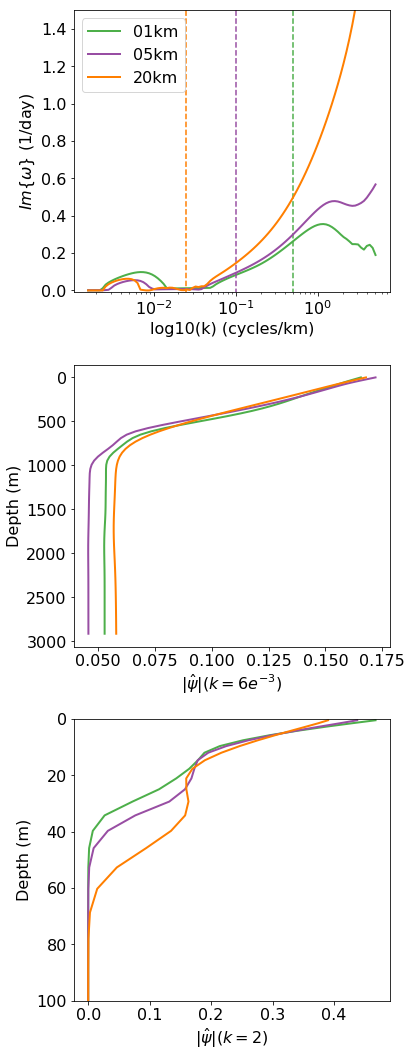

In [320]:
# vertical modes corresponding to the 2 peaks
plt.figure(figsize=(6,15))
n=2
plt.subplot(311)
for key in ['01','05','20']:
    plt.plot((k*1000./np.pi/2), (eigen_calc[key]['w'].imag[0]*24*3600.).T,label=key+'km',color=colors[n], linewidth=2)
    

    y=np.linspace(-1,2)
    x = y/y/2/int(key)
    plt.plot(x,y,'--', color=colors[n])
    n+=1
    
plt.plot()
plt.xscale('log')
plt.xlabel('log10(k) (cycles/km)')
plt.ylabel('$Im\{\omega\} $ (1/day)')
plt.ylim(-0.01, 1.5)
#plt.grid()
plt.legend()

plt.subplot(312)
n=2
for key in ['01','05','20']:
    psi = eigen_calc[key]['psi']
    w = eigen_calc[key]['w']
    zpsi = eigen_calc[key]['zpsi']    
    plt.plot(np.reshape(np.absolute(psi[:, 0]), (len(zpsi), psi.shape[-1]*psi.shape[-2])
                   )[:, np.argwhere(k*1000./np.pi/2<6e-3)[-1] ], zpsi, color=colors[n], linewidth=2)
    n+=1

plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('$|\hat{\psi}| (k=6e^{-3})$')

plt.subplot(313)
n=2
for key in ['01','05','20']:
    psi = eigen_calc[key]['psi']
    w = eigen_calc[key]['w']
    zpsi = eigen_calc[key]['zpsi']    
    plt.plot(np.reshape(np.absolute(psi[:, 0]), (len(zpsi), psi.shape[-1]*psi.shape[-2])
                   )[:, np.argwhere(k*1000./np.pi/2<2)[-1] ], zpsi, color=colors[n], linewidth=2)
    n+=1
plt.gca().invert_yaxis()
plt.ylim([100,0])
plt.ylabel('Depth (m)')
plt.xlabel('$|\hat{\psi}| (k=2)$')
plt.tight_layout()

plt.savefig('figures/instability_downstream.eps', format='eps', dpi=100)